<a href="https://colab.research.google.com/github/gislanysa/senac-datascience/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [9]:
df = pd.read_csv('train.csv')
df_original_para_graficos = df.copy()
print("Informações Iniciais do Dataset")
df.info()
print("\n")

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

numeric_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.to_csv('titanic_tratado.csv', index=False)
print("="*50)
print("Dataset tratado e salvo como titanic_tratado.csv")
print(df.head())
print("\n" * 2)

Informações Iniciais do Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dataset tratado e salvo como titanic_tratado.csv
   PassengerId  Survived    Pclass  \
0            1         0  0.827377   
1            2         1 -1.566107   
2            3         1  0.827377   
3        

In [10]:
print("=" * 50)
print("Análise Descritiva do Dataset Original")
print(df_original_para_graficos[['Age', 'Fare', 'Survived']].describe())

print("\nFrequência de Sobreviventes (0 = Não, 1 = Sim):")
print(df_original_para_graficos['Survived'].value_counts())

print("\nFrequência por Sexo:")
print(df_original_para_graficos['Sex'].value_counts())
print("=" * 50)
print("\n" * 2)

Análise Descritiva do Dataset Original
              Age        Fare    Survived
count  714.000000  891.000000  891.000000
mean    29.699118   32.204208    0.383838
std     14.526497   49.693429    0.486592
min      0.420000    0.000000    0.000000
25%     20.125000    7.910400    0.000000
50%     28.000000   14.454200    0.000000
75%     38.000000   31.000000    1.000000
max     80.000000  512.329200    1.000000

Frequência de Sobreviventes (0 = Não, 1 = Sim):
Survived
0    549
1    342
Name: count, dtype: int64

Frequência por Sexo:
Sex
male      577
female    314
Name: count, dtype: int64





In [11]:
df_original_para_graficos['Sobreviveu'] = df_original_para_graficos['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})


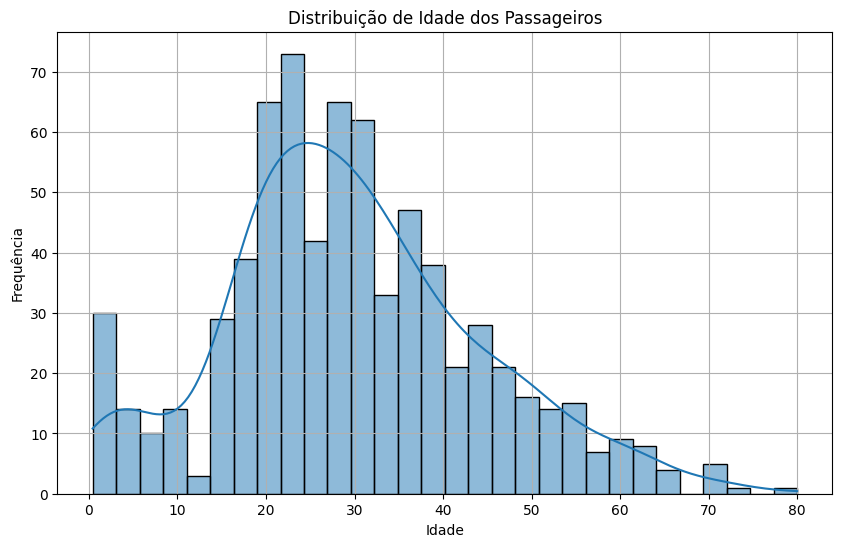

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_original_para_graficos, x='Age', kde=True, bins=30)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.savefig('histograma_idade.png')
plt.show()

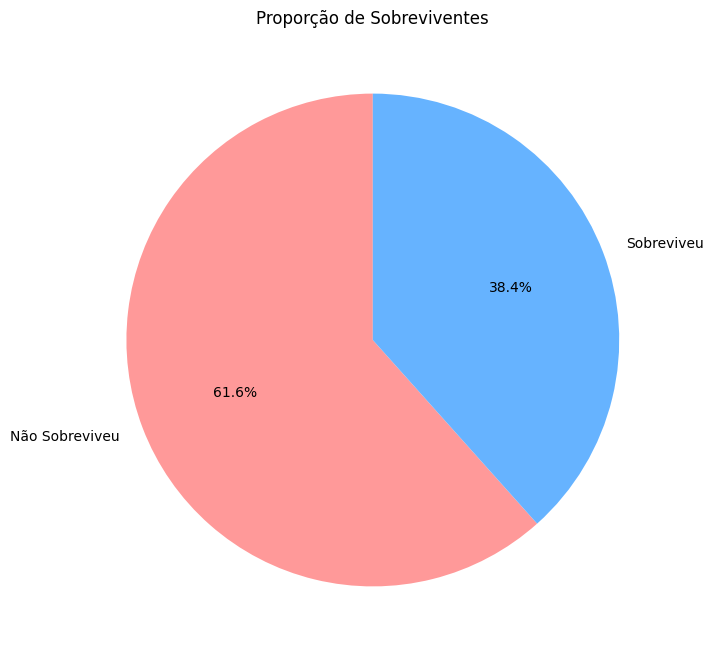

In [13]:
sobreviventes_counts = df_original_para_graficos['Sobreviveu'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sobreviventes_counts, labels=sobreviventes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proporção de Sobreviventes')
plt.ylabel('')
plt.savefig('pizza_sobreviventes.png')
plt.show()

Podemos observar que a maior parte dos passageiros não sobreviveu, podemos concluir que as chances de sobrevivencia eram baixas para a maioria dos passageiros

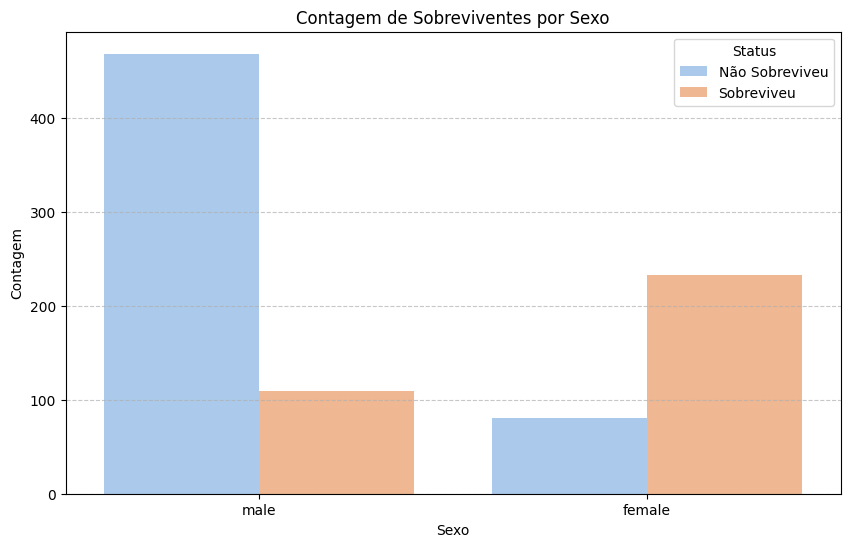

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original_para_graficos, x='Sex', hue='Sobreviveu', palette='pastel')
plt.title('Contagem de Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status')
plt.savefig('barras_sobreviventes_sexo.png')
plt.show()

Se observarmos os gráficos podemos ver que a taxa de sobrevivencia de mulheres foi maior do que a de homens

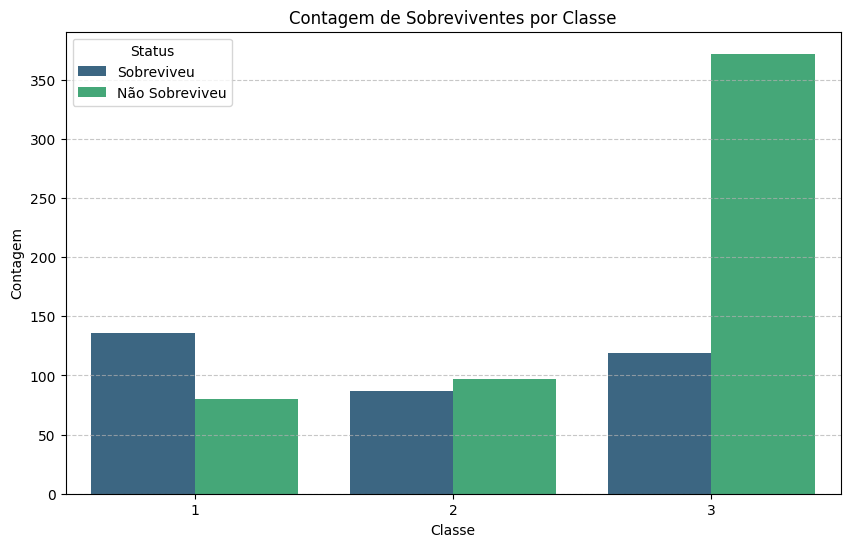

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original_para_graficos, x='Pclass', hue='Sobreviveu', palette='viridis')
plt.title('Contagem de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Status')
plt.savefig('barras_sobreviventes_classe.png')
plt.show()

A classe do bilhete de um passageiro era o segundo fato que mais importava, observe que na primeira classe há mais sobreviventes do que mortos. Na segunda classe o número é equilibrado. Já na terceira classe o número de mortos é muito maior do que o de sobreviventes

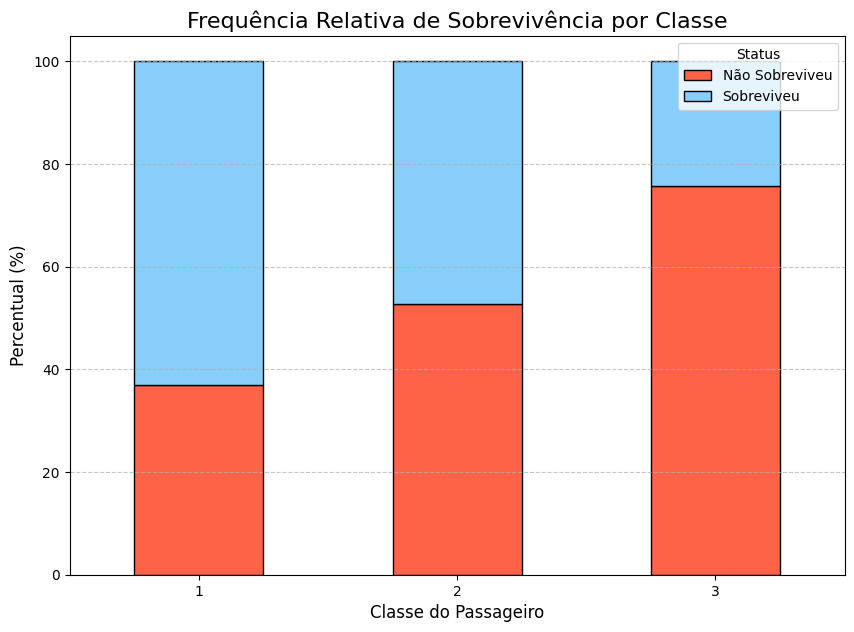

In [22]:
rel_freq_pclass = pd.crosstab(df_original_para_graficos['Pclass'], df_original_para_graficos['Sobreviveu'], normalize='index') * 100
rel_freq_pclass.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#ff6347', '#87cefa'], edgecolor='black')
plt.title('Frequência Relativa de Sobrevivência por Classe', fontsize=16)
plt.xlabel('Classe do Passageiro', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('freq_relativa_classe.png')
plt.show()


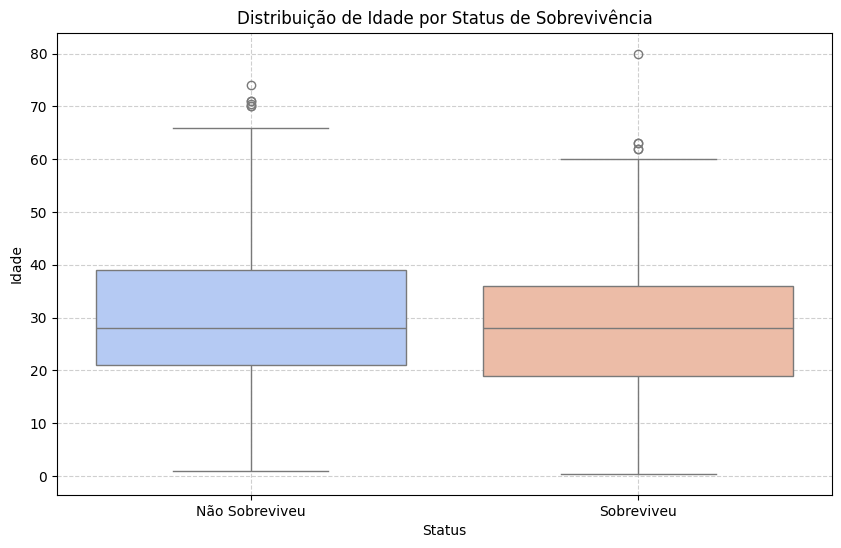

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_original_para_graficos, x='Sobreviveu', y='Age',hue='Sobreviveu', palette='coolwarm', legend=False)
plt.title('Distribuição de Idade por Status de Sobrevivência')
plt.xlabel('Status')
plt.ylabel('Idade')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('boxplot_idade_sobrevivencia.png')
plt.show()

A questão da idade teve um papel importante principalmente para as crianças, os gráficos mostram que elas tiveram mais chances de sobreviver do que os adultos

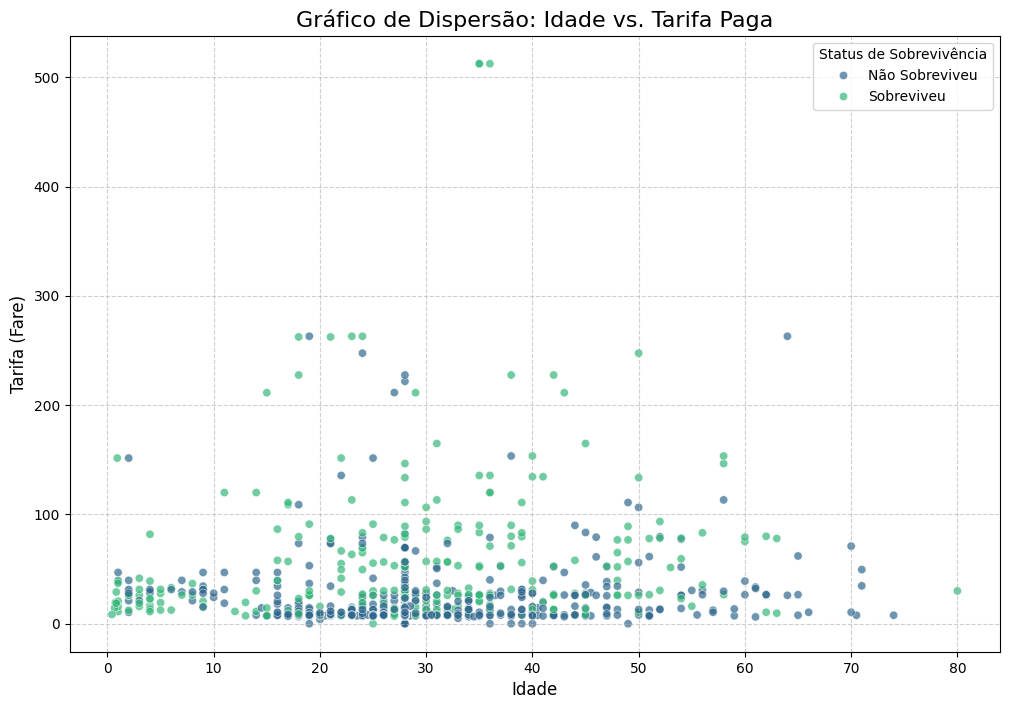

In [19]:
df_original_para_graficos['Age'] = df_original_para_graficos['Age'].fillna(df_original_para_graficos['Age'].median())
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_original_para_graficos, x='Age', y='Fare', hue='Sobreviveu', palette='viridis', alpha=0.7)
plt.title('Gráfico de Dispersão: Idade vs. Tarifa Paga', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Tarifa (Fare)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Status de Sobrevivência')
plt.savefig('dispersao_idade_tarifa.png')
plt.show()

Podemos observar que o perfil de passageiro que tinha maior chance de sobreviver era mulheres ou crianças viajando na primeira classe. E o perfil de passageiro com menos chance de sobreviver era homem adulto viajando na terceira classe